### [Scipy](https://docs.scipy.org/doc/scipy/tutorial/index.html)

SciPy 是一个开源的 Python 算法库和数学工具包。  
Scipy 是基于 Numpy 的科学计算库，用于数学、科学、工程学等领域，很多高阶抽象的物理模型需要使用 Scipy。  
SciPy 包含的模块有最优化、线性代数、积分、插值、特殊函数、快速傅里叶变换、信号处理和图像处理、常微分方程求解和其他科学与工程中常用的计算。

|模块名|功能|
|--|--|
|scipy.cluster|聚类|
|scipy.constants|数学常量|
|scipy.fft|快速傅里叶变换|
|scipy.integrate|积分|
|scipy.interpolate|插值|
|scipy.io|数据输入输出|
|scipy.linalg|线性代数|
|scipy.misc|图像处理|
|scipy.ndimage|N 维图像|
|scipy.odr|正交距离回归|
|scipy.optimize|优化算法|
|scipy.signal|信号处理|
|scipy.sparse|稀疏矩阵|
|scipy.spatial|空间数据结构和算法|
|scipy.special|特殊数学函数|
|scipy.stats|统计函数|

#### [Statistics analysis](https://www.scribbr.com/statistics/statistical-tests/)
- [T检验](#t-test)  
    单样本t检验和独立两样本t检验
- [卡方检验](#chi-squared-test)
- [KS检验](#ks-test)

[scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests)

#### [最小二乘法(OLS)](#ols)
- statsmodels
- sklearn
- [scipy.optimize](https://docs.scipy.org/doc/scipy/reference/optimize.html)

#### Seaborn
- [Visualizing linear relationships](https://www.cntofu.com/book/172/docs/6.md)  
    `regplot()` and `lmplot()`

#### 假设检验

假设检验(hypothesis testing)，又称统计假设检验，是用来判断样本与样本、样本与总体的差异是由抽样误差引起还是本质差别造成的统计推断方法。显著性检验是假设检验中最常用的一种方法，也是一种最基本的统计推断形式，其基本原理是先对总体的特征做出某种假设，然后通过抽样研究的统计推理，对此假设应该被拒绝还是接受做出推断。常用的假设检验方法有Z检验、t检验、卡方检验、F检验等。

SciPy 提供了`scipy.stats`的模块来执行显著性检验的功能。

**假设检验的基本原理：**

假设检验使用了一种类似于“反证法”的推理方法，它的特点是：
- 先假设总体某项假设成立，计算其会导致什么结果产生。若导致不合理现象产生，则拒绝原先的假设；若并不导致不合理的现象产生，则接受原先的假设。
- 所谓不合理现象产生，并非指形式逻辑上的绝对矛盾，而是基于小概率原理：概率很小的事件在一次试验中几乎是不可能发生的，若发生了，就是不合理的。至于怎样才算是“小概率”呢？通常可将概率不超过0.05的事件称为“小概率事件”，也可视具体情形而取0.1或0.01等。在假设检验中常记这个概率为α，称为***显著性水平***。而把原先设定的假设称为***零假设***，记作H0。把与H0相反的假设称为***备择假设***，它是原假设被拒绝时而应接受的假设，记作H1。

**$\alpha$值和$P$值**

$\alpha$通常被称作显著性水平，表示数据必须有多接近极端才能拒绝零假设，通常取值为 0.01、0.05 或 0.1。  
$p$值表明数据实际接近极端的程度，通过比较$p$值和$\alpha$来确定统计显著性水平。  
如果$p$值 <= $\alpha$，我们拒绝原假设并声称数据具有统计显著性，否则我们接受原假设。

**单侧检验和双侧检验**

单侧检验指使用检验统计量的概率密度曲线的单侧尾部计算显著性水平概率的检验。用于检验大于、小于、高于、低于、优于、劣于等有确定性大小关系的假设检验问题。假设检验写作H1：μ1<μ2 或 μ1>μ2。

双侧检验指使用检验统计量的概率密度曲线的两侧尾部计算显著性水平概率的检验， 应用于理论上不能确定两个总体一个一定比另一个大或小的假设检验。假设检验写作H1：μ1≠μ2。

**假设检验的一般步骤**

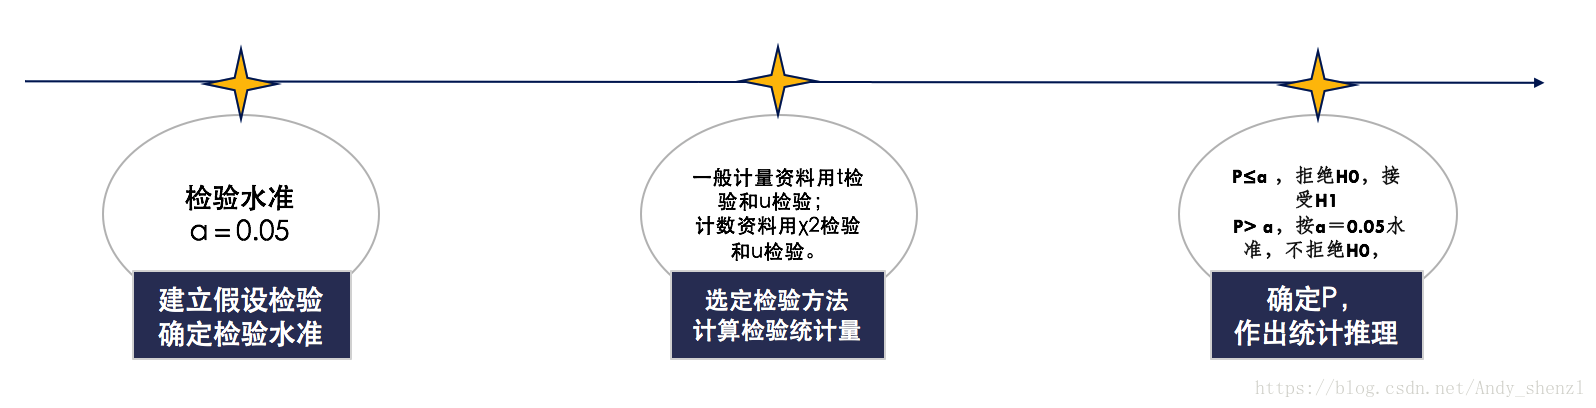

#### 假设检验方法

**u检验和t检验**

t检验是英国统计学家Cosset在1908年以笔名“student”发表的，因此亦称student-t检验(Student's t-test)。t检验是用t分布理论来推断差异发生的概率，从而判定两总体均数的差异是否有统计学意义，主要用于样本含量较小(如n<60)，总体标准差σ未知，呈正态分布的计量资料。若样本含量较大(如n>60)，或样本含量虽小，但总体标准差σ已知，则可采用u检验(亦称：z检验)。但在统计软件中，无论样本量大小，均采用t检验进行统计分析。

t检验和u检验的适用条件：①样本来自正态总体或近似正态总体；②两样本总体方差相等，即具有方差齐性。在实际应用时，如与上述条件略有偏离，对结果亦不会有太大影响；③两组样本应相互独立。根据比较对象的不同，t检验又分为单样本t检验、配对t检验和两独立样本t检验。

**F检验**

F检验是对两个正态分布的方差齐性检验，简单来说，就是检验两个分布的方差是否相等。

**卡方检验**

卡方检验是一种用途很广的计数资料的假设检验方法。它属于非参数检验的范畴，卡方独立性检验是用于两个或两个以上因素多项分类的计数资料分析，即研究两类变量之间（以列联表形式呈现）的关联性和依存性，或相关性、独立性、交互作用性。

<div id='t-test'></div>

#### t检验

t检验（t test）又称学生t检验（Student t-test）可以说是统计推断中非常常见的一种检验方法，适用于统计量服从正态分布，但方差未知的情况。

t检验的前提是要求样本服从正态分布或近似正态分布。若不满足这一条件，则可以利用一些变换（取对数、开根号、倒数等等）试图将其转化为服从正态分布的数据。如若还是不满足正态分布，只能利用非参数检验方法。不过当样本量大于30的时候，可以认为数据近似正态分布。

t检验最常见的四个用途：
- 单样本均值检验（One-sample t-test）  
    用于检验总体方差未知、正态数据或近似正态的单样本的均值是否与已知的总体均值相等
- 独立两样本均值检验（Independent two-sample t-test）  
    用于检验两组独立的正态数据或近似正态的样本的均值是否相等，这里可根据总体方差是否相等分类讨论
- 配对样本均值检验（Dependent t-test for paired samples）  
    用于检验一对配对样本的均值的差是否等于某一个值
- 回归系数的显著性检验（t-test for regression coefficient significance）  
    用于检验回归模型的解释变量对被解释变量是否有显著影响

T检验的相关学习资料：
- [方差分析、T检验、卡方分析如何区分](https://zhuanlan.zhihu.com/p/57756620)
- [三种T检验的详细区分](https://zhuanlan.zhihu.com/p/68736699)
- [一文详解t检验](https://zhuanlan.zhihu.com/p/138711532)

#### Performing a t-test

**单样本T检验**：

检验原假设：样本均值无差异(μ=μ0)

Python命令：`scipy.stats.ttest_1samp(a=Sample observation, popmean=Expected value in null hypothesis)`

结果解释：当p值小于某个显著性水平α(比如0.05)时，则认为样本均值存在显著差异，具体的分析要看所选择的是双边假设还是单边假设（又分小于和大于）注意ttest_1samp进行双侧检验。

In [46]:
import numpy as np
import pandas as pd
from scipy import stats

x = np.random.normal(size = 100)

stats.ttest_1samp(x, 0)
# if p-value < 0.05, we could reject H0

Ttest_1sampResult(statistic=0.8641172739136777, pvalue=0.38961231253718975)

In [47]:
x.mean()

0.09660139516823164

(array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 2., 2.,
        3., 2., 1., 0., 4., 1., 2., 2., 4., 3., 8., 4., 1., 5., 4., 6., 0.,
        6., 4., 3., 3., 3., 1., 3., 2., 5., 2., 0., 1., 0., 2., 2., 3.]),
 array([-3.15335745, -3.04693156, -2.94050567, -2.83407978, -2.72765389,
        -2.621228  , -2.51480211, -2.40837622, -2.30195033, -2.19552444,
        -2.08909855, -1.98267266, -1.87624677, -1.76982087, -1.66339498,
        -1.55696909, -1.4505432 , -1.34411731, -1.23769142, -1.13126553,
        -1.02483964, -0.91841375, -0.81198786, -0.70556197, -0.59913608,
        -0.49271019, -0.3862843 , -0.27985841, -0.17343252, -0.06700663,
         0.03941926,  0.14584515,  0.25227104,  0.35869693,  0.46512282,
         0.57154871,  0.6779746 ,  0.78440049,  0.89082639,  0.99725228,
         1.10367817,  1.21010406,  1.31652995,  1.42295584,  1.52938173,
         1.63580762,  1.74223351,  1.8486594 ,  1.95508529,  2.06151118,
         2.16793707]),
 <BarContainer object

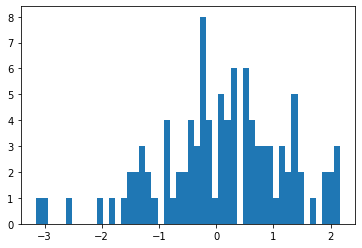

In [48]:
import matplotlib.pyplot as plt

plt.hist(x, bins = 50)  ## 绘制直方图

**独立两样本T检验**：

两样本t检验是比较两个样本所代表的两个总体均值是否存在显著差异。

检验原假设：样本均值无差异(μ=μ0)

Python命令：`stats.ttest_ind(data1,data2)`

(array([2., 1., 2., 4., 3., 4., 6., 4., 2., 8., 1., 5., 4., 2., 1., 0., 1.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 2., 1., 1., 3., 6., 3., 4., 6., 9., 3., 3., 3., 4.]),
 array([-7.5399554 , -7.25643399, -6.97291258, -6.68939117, -6.40586976,
        -6.12234835, -5.83882694, -5.55530553, -5.27178412, -4.98826271,
        -4.7047413 , -4.42121989, -4.13769848, -3.85417707, -3.57065566,
        -3.28713425, -3.00361284, -2.72009142, -2.43657001, -2.1530486 ,
        -1.86952719, -1.58600578, -1.30248437, -1.01896296, -0.73544155,
        -0.45192014, -0.16839873,  0.11512268,  0.39864409,  0.6821655 ,
         0.96568691,  1.24920832,  1.53272973,  1.81625114,  2.09977255,
         2.38329396,  2.66681538,  2.95033679,  3.2338582 ,  3.51737961,
         3.80090102,  4.08442243,  4.36794384,  4.65146525,  4.93498666,
         5.21850807,  5.50202948,  5.78555089,  6.0690723 ,  6.35259371,
         6.63611512]),
 <BarContainer object

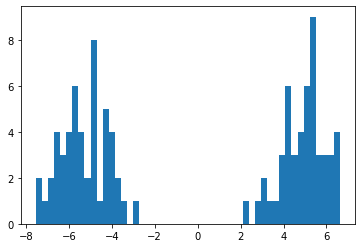

In [49]:
import numpy as np
import pandas as pd
from scipy import stats

x1 = 5 + np.random.normal(size = 50)
x2 = -5 + np.random.normal(size = 50)
y = np.concatenate((x1, x2)) ## np.concatenate 连接两个数组

import matplotlib.pyplot as plt
plt.hist(y, bins = 50)

In [50]:
y.mean()

-0.18203257836886066

对由x1和x2构成的样本y作单样本t检验：

In [51]:
stats.ttest_1samp(y, 0)

Ttest_1sampResult(statistic=-0.3467248632342788, pvalue=0.7295339272347334)

两样本t检验除了要求样本来自正态分布，还要求两个样本的总体方差相等也就是**方差齐性**。  
因此当不确定两总体方差是否相等时，应先利用levene检验`stats.levene(data1,data2)`检验两总体是否具有方差齐性。  

如果返回结果的p值远大于0.05，那么我们认为两总体具有方差齐性。  
如果两总体不具有方差齐性，则需要在ttest_ind()函数中加上参数equal_val并设定为False，即：`stats.ttest_ind(data1,data2,equal_var=False)`


In [12]:
stats.levene(x1,x2)

LeveneResult(statistic=0.9574969299800732, pvalue=0.32941511474805574)

对x1和x2作独立两样本t检验：

In [140]:
stats.ttest_ind(x1,x2)
# if p-value < 0.05, the H0 could be rejected, which means x1 is not equal to x2

Ttest_indResult(statistic=44.52697082908188, pvalue=7.830596640659706e-67)

**配对T检验**

配对样本均数T检验简称配对T检验(paired t test), 又称非独立两样本均数t检验，适用于配对设计计量资料均数的比较，其比较目的是检验**两相关样本**均数所代表的未知总体均数是否有差别。与独立样本T检验相比，配对样本T检验要求**样本是配对的**。两个样本的样本量要相同；样本先后的顺序是一一对应的。

检验原假设：样本均值无差异(μ=μ0)

Python命令：`stats.ttest_rel(data1,data2)`

结果解释：当p值小于某个显著性水平α(比如0.05)时，则认为样本均值存在显著差异，具体的分析要看所选择的是双边假设还是单边假设（又分小于和大于）注意stats.ttest_rel进行双侧检验。

In [142]:
from scipy import stats
data1 = [23,20,18,29,43,35,32,40,29,26,24,26]
data2 = [1000,1000,500,500,500,100,100,100,100,100,100,100]
stats.ttest_rel(data1,data2)

Ttest_relResult(statistic=-3.149034903041314, pvalue=0.009258094005021552)

<div id='chi-squared-test'></div>

#### 卡方检验

>卡方检验（Chi-Squared Test）是一种统计量的分布在零假设成立时近似服从卡方分布的假设检验。在没有其他的限定条件或说明时，卡方检验一般指代的是皮尔森卡方检验。在卡方检验的一般运用中，研究人员将观察量的值划分成若干互斥的分类，并且使用一套理论（或零假设）尝试去说明观察量的值落入不同分类的概率分布的模型。而卡方检验的目的就在于去衡量这个假设对观察结果所反映的程度。

    注意：卡方检验仅针对分类变量

**卡方分布：** 若$n$个相互独立的随机变量，均服从标准正态分布，则这$n$个服从标准正态分布的随机变量的平方和构成一新的随机变量，其分布规律称为卡方分布$X^2$

**皮尔森卡方检验：**  
皮尔森卡方检验可用于两种情境的变项比较：***拟合优度检验***和***独立性检验***。
- 拟合优度检验(Goodness of Fit test)：验证一组观察值的次数分配是否异于理论上的分配。  
- 独立性检验：验证从两个变量抽出的配对观察值组是否互相独立。

卡方检验的三个步骤：
1. 计算卡方检验的统计值：把每一个观察值和理论值的差做平方后、除以理论值、再加总。
2. 计算统计值的自由度。
3. 依据研究者设定的置信水平（显著性水平、P值或对应Alpah值），推论能否拒绝零假设。

卡方检验的相关学习资料：
- [卡方检验（Chi-Squared Test）](https://zhuanlan.zhihu.com/p/56423752)
- [卡方检验、T检验+F检验、方差分析、Z检验](https://www.jianshu.com/p/8b7b401881d7)
- [一文详解卡方检验](https://zhuanlan.zhihu.com/p/140043959)


Python命令：
- 拟合优度检验：`stats.chisquare(f_obs = Observed frequencies in each category, f_exp = Expected frequencies in each category)`  
- 独立性检验：`stats.chi2_contingency(observed = The contingency table)`

检验原假设：观察频数与期望频数无显著差异  
结果解释：当p值小于某个显著性水平α(比如0.05)时，则拒绝原假设，认为两个样本有显著差异。

#### Performing a Chi-Square test

**拟合优度检验举例**

某科学家预言抛一个色子，各面向上的几率都相同。为了验证自己理论的正确性，该科学家抛了600次硬币，结果为一点102次，二点102次，三点96次，四点105次，五点95次，六点100次。显然这个结果和理论预期并不完全一样，那么，科学家的理论有错吗？

In [54]:
from scipy import stats

obs = [102, 102, 96, 105, 95, 100]
exp = [100, 100, 100, 100, 100, 100]
stats.chisquare(obs, exp)

Power_divergenceResult(statistic=0.74, pvalue=0.980701472519648)

从结果来看，p值为0.98，可以认为观测到的值和预期值是相近的。科学家的理论没有错，观测值和理论值的不同是由偶然误差造成的。

**独立性检验举例**

从某中学随机抽取两个班，调查他们对待文理分科的态度，结果，甲班37人赞成，27人反对；乙班39人赞成，21人反对，这两个班对待文理分科的态度是否有显著差异(α= .05)?

|  | 赞成 | 反对 | 总数 |
|--|--|--|--|
|甲班| 37 | 27 | 64 |
|乙班| 39 | 21 | 60 |
|甲班理论值| 39.23 | 24.77| 64 |
|乙班理论值| 36.77 | 23.23 | 60 |

假设两班态度无差异，则赞成的比率为(37+39)/(64+60) = 0.613

In [61]:
from scipy import stats
import numpy as np

kf_data = np.array([[37,27], [39,21]])
g, p, dof, expctd = stats.chi2_contingency(kf_data)
g, p

(0.40538080226608214, 0.5243233881944427)

结论: 因为p值=0.5243>0.05, 故接受原假设, 认为这两个班对待文理分科的态度无显著差别。

<div id='ks-test'></div>

#### KS-test

>KS(Kolmogorov-Smirnow)是一种非参数的统计检验方法，是针对连续分布的检验。这种检测常被用来比较单样本是否符合某个已知分布(将样本数据的累积分布与特定理论分布相比较，如果两者间差距较小，则推断该样本取自某特定分布簇)，或者比较两个样本是否来自于相同的分布(双样本的KS检测比较两个数据集的累积分布的相似性)。

**检验过程**

1. 提出假设H0：$F_{n}(x) = F(x)$
2. 计算样本累计频率与理论分布累计概率的绝对差，令最大的绝对差为$D_{n}$；$D_{n}=max{[F_{n}(x) - F(x)]}$
3. 用样本容量n和显著性水平a查出临界值$D_{na}$
3. 如果$D_{n} < D_{na}$，则认为原假设成立
4. 若pvalue < α 则拒绝原假设；若pvalue ≥ α则不拒绝原假设


python命令：`stats.kstest(rvs, cdf, alternative='two_sided')`

    rvs：待检验的一组一维数据
    cdf：检验方法，例如'norm'，'expon'，'rayleigh'，'gamma'，这里我们设置为'norm'，即正态性检验
    alternative：默认为双尾检验，可以设置为'less'或'greater'作单尾检验

**判断给定值是否符合正态分布**

In [59]:
import numpy as np
from scipy.stats import kstest

x = np.random.normal(size=100)

kstest(x, 'norm')

KstestResult(statistic=0.10034716430076529, pvalue=0.24915641089484752)

**判断两个变量是否来自于同一个分布**

In [19]:
import numpy as np
from scipy.stats import kstest, ks_2samp

x1 = 5 + np.random.normal(size = 50)
x2 = -5 + np.random.normal(size = 50)

kstest(x1, x2)

KstestResult(statistic=1.0, pvalue=1.9823306042836678e-29)

**Exercise：**
    
    使用scipy.stats实现正态性检验（可查阅scipy.stats的官方手册或自行搜索）。

#### 数据统计说明

使用 describe() 函数可以查看数组的信息，包含以下值：
- nobs -- 观测次数
- minmax -- 最小值和最大值
- mean -- 数学平均数
- variance -- 方差
- skewness -- 偏度
- kurtosis -- 峰度

In [8]:
import numpy as np
from scipy.stats import describe

v = np.random.normal(size=100)
res = describe(v)

print(res)

DescribeResult(nobs=100, minmax=(-2.022201215824003, 2.1855754065331614), mean=0.06970549447305932, variance=0.6866418160461444, skewness=0.04351518214421843, kurtosis=-0.16643123820009054)


<div id='ols'></div>

#### 最小二乘法（least sqaure method）

最小二乘法的主要思想是通过确定未知参数（通常是一个参数矩阵），来使得真实值和预测值的误差（也称残差）平方和最小：  
已知 $目标函数 = \sum(观测值-期望值)^2$，求 $argmin(目标函数)$

参考资料：
- [最小二乘法](https://zhuanlan.zhihu.com/p/38128785)
- [OLS在python中的四种实现方式](https://zhuanlan.zhihu.com/p/35460377)

**OLS应用举例：简单线性回归**

给定两组观测值x和y，我们要检验以下假设：y是x的线性函数。换句话说：  
$y = x * coef + intercept + e$  
其中e是观察噪声。我们将使用statsmodels模块执行以下操作：
1. 拟合线性模型。使用最简单的策略，即普通最小二乘法（OLS）。
2. 测试coef不为零。

首先，我们根据模型生成模拟数据：

In [4]:
import numpy as np
import pandas as pd

x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pd.DataFrame({'x': x, 'y': y})

然后我们指定一个OLS模型并拟合它：

In [5]:
from statsmodels.formula.api import ols

model = ols("y ~ x", data).fit()

我们可以检查从拟合得出的各种统计信息：

In [6]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           8.56e-08
Time:                        07:43:30   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

表中coef列为拟合结果，可通过params属性输出：

In [7]:
print(model.params)

Intercept   -5.533459
x            2.936888
dtype: float64


**线性关系的可视化：pandas**

<AxesSubplot:xlabel='x', ylabel='y'>

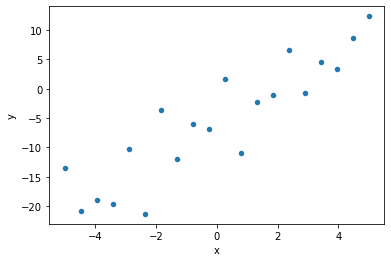

In [8]:
#### 根据dataframe绘制散点图

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR') ## 设置日志仅显示error级别的通知

# data['yf']=model.fittedvalues
data[['x','y']].plot('x', 'y', kind = 'scatter') ## 绘制散点图

**线性关系的可视化：seaborn**

regplot函数和lmplot函数均可绘制 x 和 y 这两个变量的散点图，并拟合回归模型 y ~ x，绘制出回归直线和95%的回归置信区间。  

<AxesSubplot:xlabel='x', ylabel='y'>

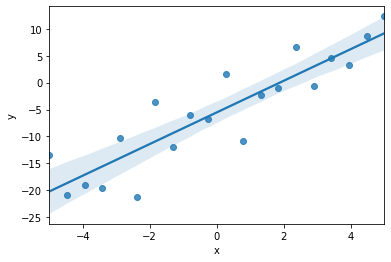

In [9]:
import seaborn as sns

# sns.lmplot(y='y', x='x', data=data)
sns.regplot(y='y', x='x', data=data)

考虑线性回归的如下形式：
$$Y = \beta X+ \epsilon$$
OLS对于普通最小二乘的估计为：
$$\beta = (X^TX)^{-1}X^TY$$

**Exercise1：**

    阅读下面的代码，理解如何通过编写代码实现OLS。

In [68]:
import numpy as np
import pandas as pd

x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

#### 最小二乘法的代码实现
def simple_ols(y,x):

    x = np.c_[np.ones(x.shape[0]),x]
    inv_xx = np.linalg.inv(np.dot(x.T,x))
    b = np.dot(inv_xx, np.dot(x.T,y)) 

    nobs = y.shape[0]                     # number of observations
    ncoef = x.shape[1]                    # number of coef.
    df_e = nobs - ncoef              # degrees of freedom, error 
    df_r = ncoef - 1                      # degrees of freedom, regression 

    e = y - np.dot(x,b)            # residuals
    sse = np.dot(e,e)/df_e         # Sum Squared Error，误差平方和
    se = np.sqrt(np.diagonal(sse*inv_xx))  # coef. standard errors
    
    import scipy
    
    t = b / se                       # coef. t-statistics
    p = (1-scipy.stats.t.cdf(abs(t), df_e)) * 2    # coef. p-values

    R2 = 1 - e.var()/y.var()         # model R-squared
    R2adj = 1-(1-R2)*((nobs-1)/(nobs-ncoef))   # adjusted R-square

    F = (R2/df_r) / ((1-R2)/df_e)  # model F-statistic
    Fpv = 1-scipy.stats.f.cdf(F, df_r, df_e)  # F-statistic p-value
    res = {'b':b, 'SSE': sse, 'SE': se, 't':t, 'p':p, 'r2':R2, 'r2adj':R2adj, 'F':F, 'Prob(F)': Fpv}
    return res


b = simple_ols(y,x)
b

{'b': array([-5.53345855,  2.93688832]),
 'SSE': 21.46274053808336,
 'SE': array([1.03592327, 0.34133857]),
 't': array([-5.34157181,  8.60403296]),
 'p': array([4.45960678e-05, 8.56064915e-08]),
 'r2': 0.8044102939875739,
 'r2adj': 0.7935441992091058,
 'F': 74.02938317651765,
 'Prob(F)': 8.560649156219569e-08}

**Exercise2：**

    scipy库也提供了实现最小二乘法的途径，请大家参阅官方文档并理解不同方法调用时的区别。